In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('HOG_TODO.csv')

# Dividir los datos en características (features) y etiquetas (labels)
X = df.drop("etiqueta", axis=1)  # Características
y = df["etiqueta"]  # Etiquetas

print("Características: ", X.shape)
print("Etiqueta: ", y.shape)

Características:  (900, 2160)
Etiqueta:  (900,)


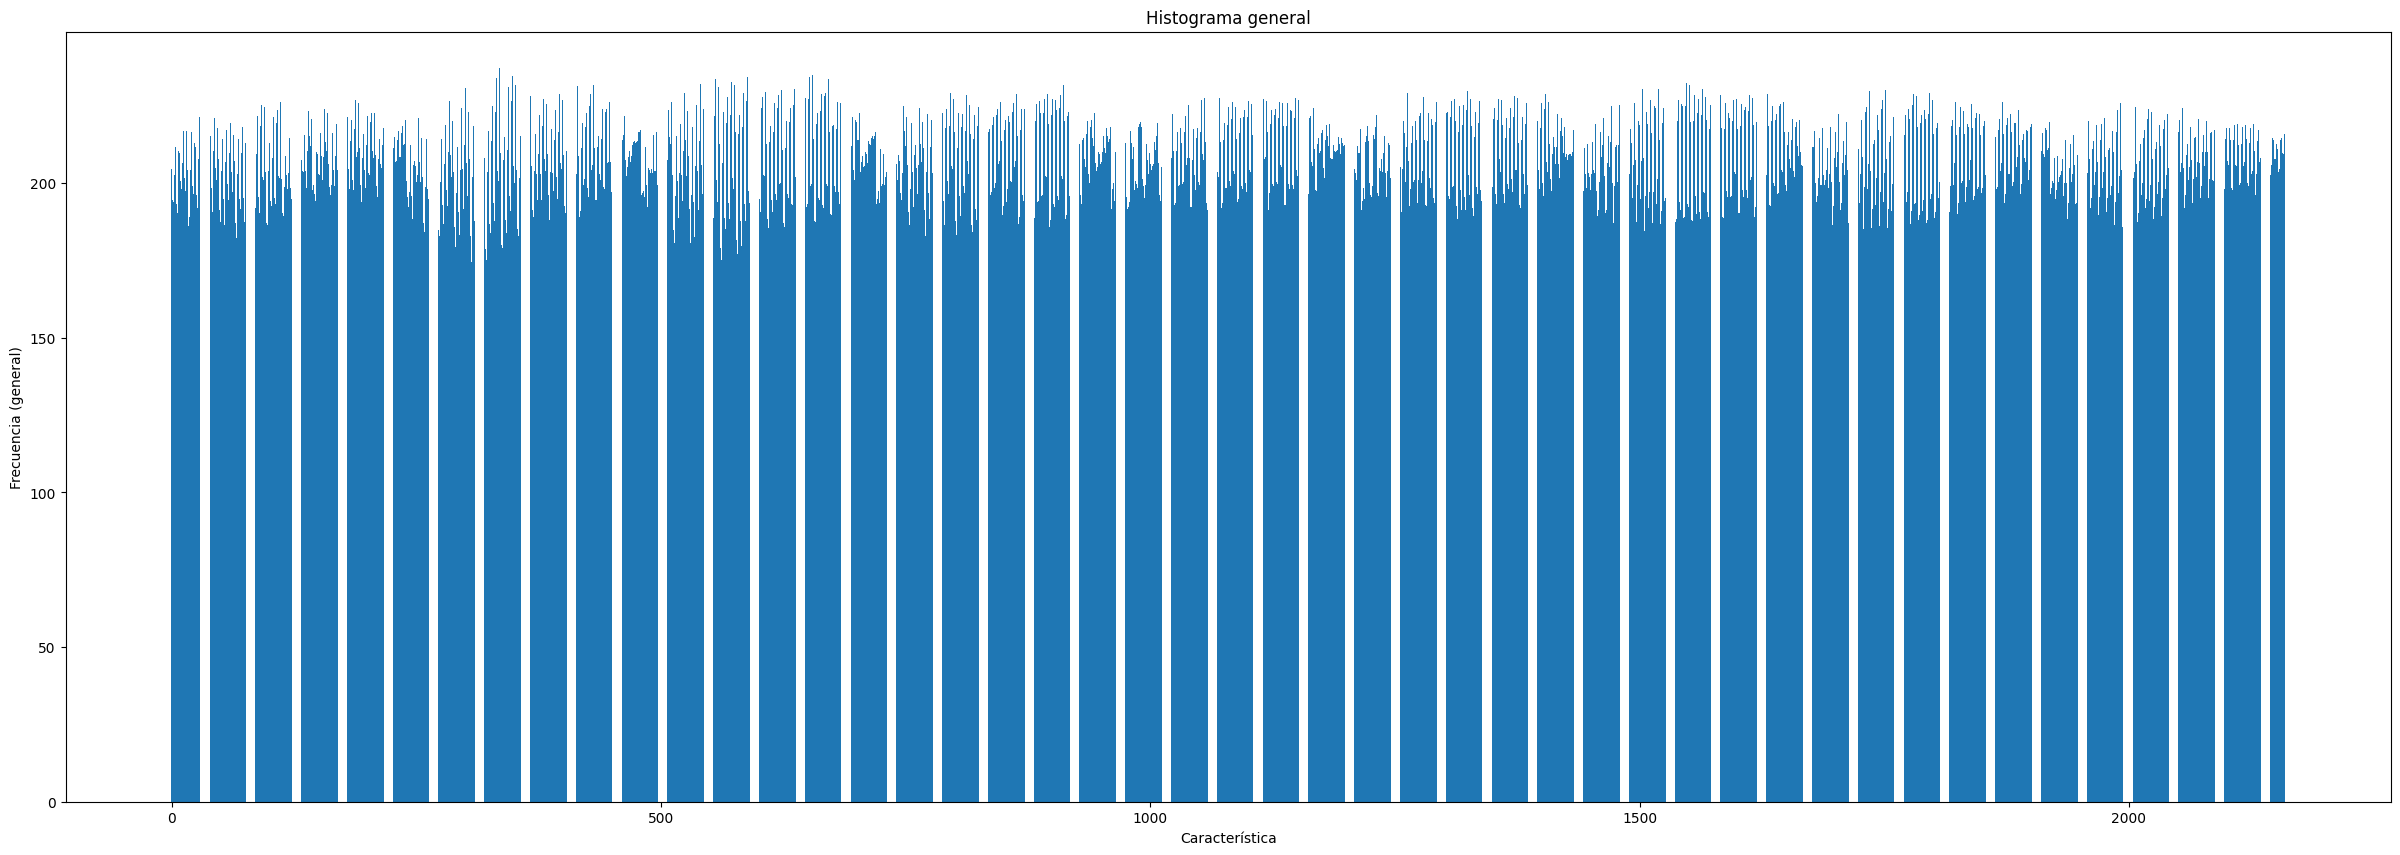

Los tres valores más bajos del histograma general son:
HOG_546    173.854999
HOG_306    174.500181
HOG_562    175.072777
dtype: float64
Los tres valores más altos del histograma general son:
HOG_335    237.124495
HOG_655    234.946032
HOG_348    234.591280
dtype: float64


In [4]:

# Crea el histograma combinando las características
histograma_general = np.sum(X, axis=0)

# Visualiza el histograma
plt.figure(figsize=(30, 10))
plt.bar(range(len(histograma_general)), histograma_general)
plt.title('Histograma general')
plt.xlabel('Característica')
plt.ylabel('Frecuencia (general)')
plt.show()

# Ordena el DataFrame por la columna 'etiqueta' y selecciona los primeros tres registros
tres_mas_bajos = histograma_general.sort_values().head(3)
print('Los tres valores más bajos del histograma general son:')
print(tres_mas_bajos)

# Ordena el DataFrame por la columna 'etiqueta' en orden descendente y selecciona los primeros tres registros
tres_mas_altos = histograma_general.sort_values(ascending=False).head(3)
print('Los tres valores más altos del histograma general son:')
print(tres_mas_altos)

Número de clases:  3
Los tres valores más bajos para la clase 1 son:
HOG_306    50.057307
HOG_546    50.138929
HOG_322    50.632467
dtype: float64
Los tres valores más altos para la clase 1 son:
HOG_335    86.771111
HOG_591    85.481089
HOG_316    85.336125
dtype: float64
------------------------------------------------
Los tres valores más bajos para la clase 2 son:
HOG_578    51.278676
HOG_306    52.169706
HOG_610    52.202882
dtype: float64
Los tres valores más altos para la clase 2 son:
HOG_380    87.573710
HOG_620    87.415998
HOG_364    87.219450
dtype: float64
------------------------------------------------
Los tres valores más bajos para la clase 3 son:
HOG_624    56.076555
HOG_832    56.853948
HOG_848    57.108699
dtype: float64
Los tres valores más altos para la clase 3 son:
HOG_606    79.909796
HOG_718    79.904121
HOG_478    79.612600
dtype: float64
------------------------------------------------


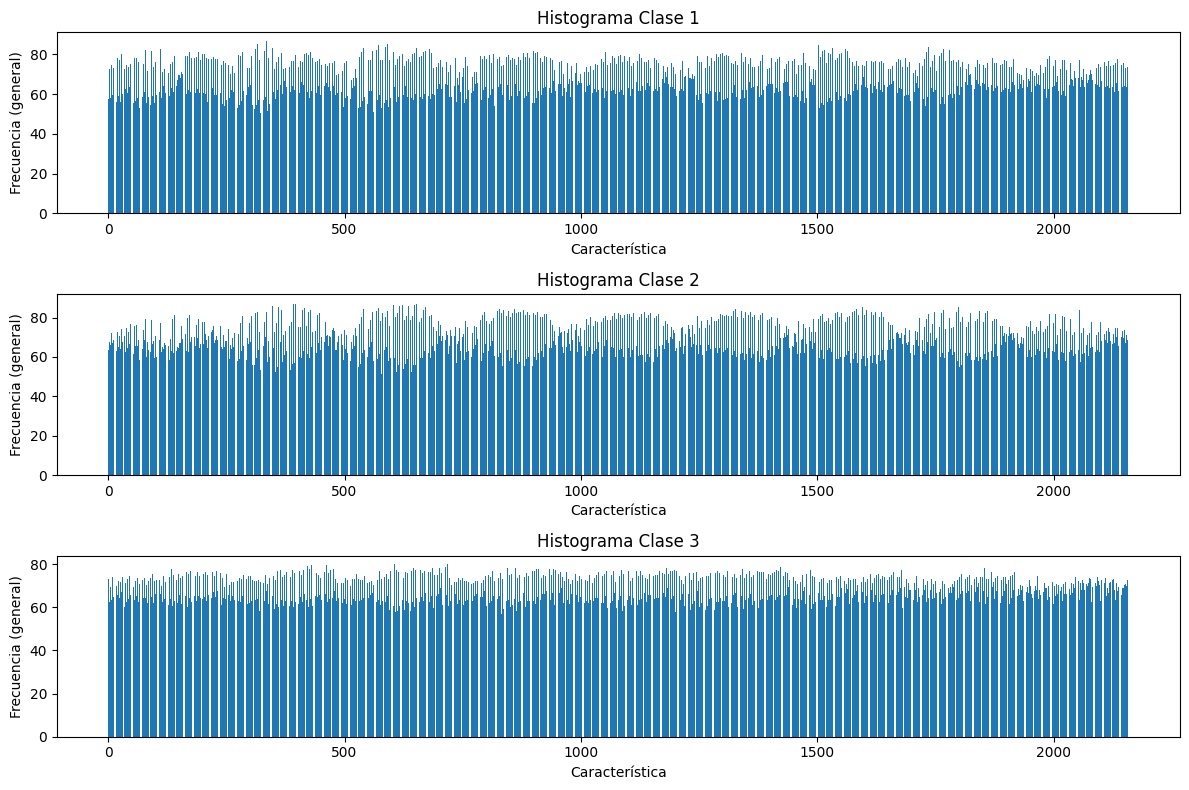

In [8]:
# Número de clases
etiquetas_clases = np.unique(y)
print("Número de clases: ", len(etiquetas_clases))

# Inicializa una lista para almacenar histogramas por clase
histograma_clase = []

# Itera sobre cada clase y calcula el histograma correspondiente
for etiqueta_clase in etiquetas_clases:
    # Filtra las características por clase
    caracteristicas_clase = X[y == etiqueta_clase]

    # Crea el histograma combinando las características para esta clase
    histograma_general = np.sum(caracteristicas_clase, axis=0)
    
    # Agrega el histograma de esta clase a la lista
    histograma_clase.append(histograma_general)

# Visualiza los histogramas para cada clase
plt.figure(figsize=(12, 8))
for i, (etiqueta_clase, histogram) in enumerate(zip(etiquetas_clases, histograma_clase)):
    plt.subplot(len(etiquetas_clases), 1, i+1)
    plt.bar(range(len(histogram)), histogram)
    plt.title('Histograma Clase {}'.format(etiqueta_clase))
    plt.xlabel('Característica')
    plt.ylabel('Frecuencia (general)')
    
        # Ordena el DataFrame por la columna 'etiqueta' y selecciona los primeros tres registros
    tres_mas_bajos = histogram.sort_values().head(3)
    print('Los tres valores más bajos para la clase {} son:'.format(etiqueta_clase))
    print(tres_mas_bajos)

    # Ordena el DataFrame por la columna 'etiqueta' en orden descendente y selecciona los primeros tres registros
    tres_mas_altos = histogram.sort_values(ascending=False).head(3)
    print('Los tres valores más altos para la clase {} son:'.format(etiqueta_clase))
    print(tres_mas_altos)
    print("------------------------------------------------")

plt.tight_layout()
plt.show()